In [1]:
import json
from tqdm import tqdm
from datasets import Dataset

In [7]:
with open("../data/hypernymy-train.json", 'r') as f:
    data_hypernym = json.load(f)
print(len(data_hypernym))
print(data_hypernym[0])
print(data_hypernym[0].keys())
for k, v in data_hypernym[0].items():
    print(k, v)

3000
{'noun1': 'blazers', 'noun2': 'clothing', 'taxonomic': 'yes', 'generator-prompt': 'Complete the sentence: blazers are a kind of', 'generator-completion': ' clothing', 'discriminator-prompt': 'Do you think bees are furniture? Answer: No\n\nDo you think corgis are dogs? Answer: Yes\n\nDo you think trucks are a fruit? Answer: No\n\nDo you think robins are birds? Answer: Yes\n\nDo you think blazers are a clothing? Answer:', 'discriminator-gold-completion': ' Yes', 'generator-log-prob': -3.920002470624733, 'discriminator-log-prob': -0.2735298495263923}
dict_keys(['noun1', 'noun2', 'taxonomic', 'generator-prompt', 'generator-completion', 'discriminator-prompt', 'discriminator-gold-completion', 'generator-log-prob', 'discriminator-log-prob'])
noun1 blazers
noun2 clothing
taxonomic yes
generator-prompt Complete the sentence: blazers are a kind of
generator-completion  clothing
discriminator-prompt Do you think bees are furniture? Answer: No

Do you think corgis are dogs? Answer: Yes

Do y

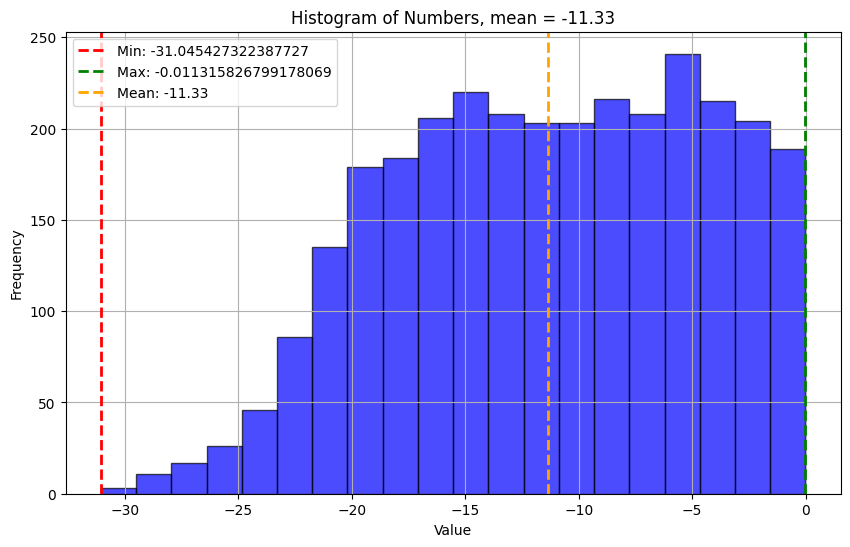

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Sample list of numbers
data = [d['generator-log-prob'] for d in data_hypernym]

# Calculate min, max, and mean
min_value = np.min(data)
max_value = np.max(data)
mean_value = np.mean(data)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, alpha=0.7, color='blue', edgecolor='black')

# Adding lines for min, max, and mean
plt.axvline(min_value, color='red', linestyle='dashed', linewidth=2, label=f'Min: {min_value}')
plt.axvline(max_value, color='green', linestyle='dashed', linewidth=2, label=f'Max: {max_value}')
plt.axvline(mean_value, color='orange', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Adding labels and title
plt.title(f'Histogram of Numbers, mean = {mean_value:.2f}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()

# Show the plot
plt.show()

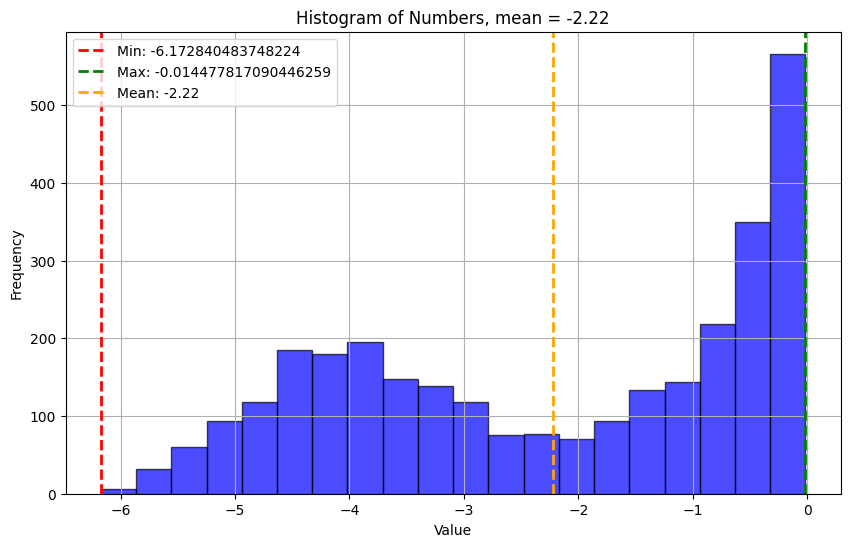

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Sample list of numbers
data = [d['discriminator-log-prob'] for d in data_hypernym]

# Calculate min, max, and mean
min_value = np.min(data)
max_value = np.max(data)
mean_value = np.mean(data)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, alpha=0.7, color='blue', edgecolor='black')

# Adding lines for min, max, and mean
plt.axvline(min_value, color='red', linestyle='dashed', linewidth=2, label=f'Min: {min_value}')
plt.axvline(max_value, color='green', linestyle='dashed', linewidth=2, label=f'Max: {max_value}')
plt.axvline(mean_value, color='orange', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Adding labels and title
plt.title(f'Histogram of Numbers, mean = {mean_value:.2f}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()

# Show the plot
plt.show()

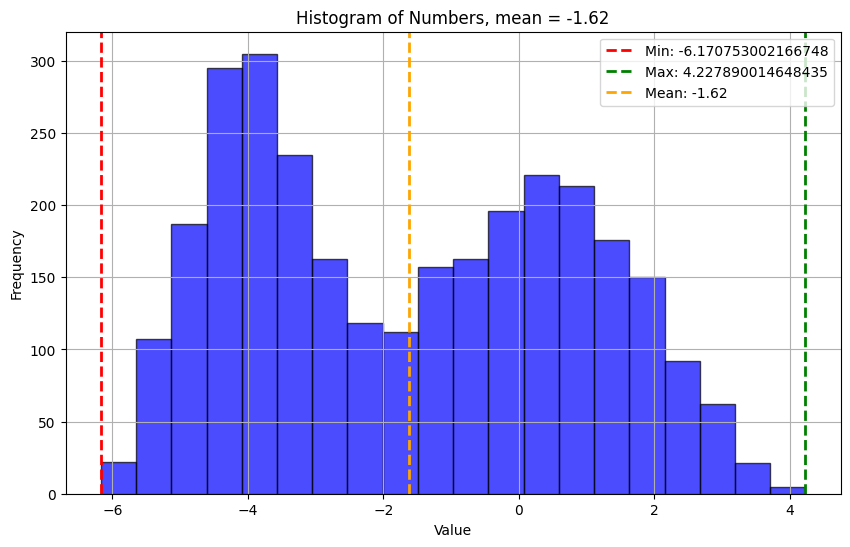

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Sample list of numbers
data = [d['discriminator-log-prob'] for d in data_hypernym]
data = [d - np.log(1-np.exp(d)) for d in data]
# Calculate min, max, and mean
min_value = np.min(data)
max_value = np.max(data)
mean_value = np.mean(data)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, alpha=0.7, color='blue', edgecolor='black')

# Adding lines for min, max, and mean
plt.axvline(min_value, color='red', linestyle='dashed', linewidth=2, label=f'Min: {min_value}')
plt.axvline(max_value, color='green', linestyle='dashed', linewidth=2, label=f'Max: {max_value}')
plt.axvline(mean_value, color='orange', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Adding labels and title
plt.title(f'Histogram of Numbers, mean = {mean_value:.2f}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()

# Show the plot
plt.show()

## get dpo data to align discriminator with generator
- x = a bee is a kind of ... Yes or No?
- y_win = yes if generator_log_prob > -11

In [14]:
threshold = -11.3
prompts = [d['discriminator-prompt'] for d in data_hypernym]
chosen = []
rejected = []
print(np.mean([d['generator-log-prob'] for d in data_hypernym]))
for i in tqdm(range(len(data_hypernym))):
    d = data_hypernym[i]
    if d['generator-log-prob'] > threshold:
        chosen.append('Yes')
        rejected.append('No')
    else:
        chosen.append('No')
        rejected.append('Yes')

dataset_dict = {"prompt": prompts, "chosen": chosen, "rejected": rejected}
dataset = Dataset.from_dict(dataset_dict)
print(dataset)


-11.328499664063429


100%|██████████| 3000/3000 [00:00<00:00, 2158303.95it/s]

Dataset({
    features: ['prompt', 'chosen', 'rejected'],
    num_rows: 3000
})


## get dpo data to align generator with discriminator
- x = Complete the sentence. a bee is a kind of ...
- y = 
    - Sample a set of examples (n) that share the same noun 1, and different noun 2.
    - Sample some completions sort by discriminator scores. (get n pairs)

In [17]:
print(data_hypernym[0])
for k, v in data_hypernym[0].items():
    print(f"--{k}--{v}")

{'noun1': 'blazers', 'noun2': 'clothing', 'taxonomic': 'yes', 'generator-prompt': 'Complete the sentence: blazers are a kind of', 'generator-completion': ' clothing', 'discriminator-prompt': 'Do you think bees are furniture? Answer: No\n\nDo you think corgis are dogs? Answer: Yes\n\nDo you think trucks are a fruit? Answer: No\n\nDo you think robins are birds? Answer: Yes\n\nDo you think blazers are a clothing? Answer:', 'discriminator-gold-completion': ' Yes', 'generator-log-prob': -3.920002470624733, 'discriminator-log-prob': -0.2735298495263923}
--noun1--blazers
--noun2--clothing
--taxonomic--yes
--generator-prompt--Complete the sentence: blazers are a kind of
--generator-completion-- clothing
--discriminator-prompt--Do you think bees are furniture? Answer: No

Do you think corgis are dogs? Answer: Yes

Do you think trucks are a fruit? Answer: No

Do you think robins are birds? Answer: Yes

Do you think blazers are a clothing? Answer:
--discriminator-gold-completion-- Yes
--generator

In [23]:
import itertools

# Sample lists
list1 = ['A', 'B', 'C']
list2 = [1, 2, 3]

# Get all combinations
combinations = list(itertools.combinations(list1, 2))

# Print the result
for combo in combinations:
    print(combo)

('A', 'B')
('A', 'C')
('B', 'C')


In [33]:
from collections import defaultdict
import itertools
same_hyponym_dicts = defaultdict(list)
for d in data_hypernym:
    same_hyponym_dicts[d['noun1']].append(d)
print(len(same_hyponym_dicts))
num_hypernym_lists = [len(v) for v in same_hyponym_dicts.values()]
print(np.mean(num_hypernym_lists))

prompts = []
chosen = []
rejected = []
for k, v in same_hyponym_dicts.items():
    if len(v) > 1:
        pairs_combinations = list(itertools.combinations(v, 2))
        pairs_combinations = sorted(pairs_combinations, key=lambda pair: abs(pair[0]['discriminator-log-prob'] - pair[1]['discriminator-log-prob']))
        for (a,b) in pairs_combinations[:len(v)]:
            if a['discriminator-log-prob'] >= b['discriminator-log-prob']:
                prompts.append(v[0]['generator-prompt'])
                chosen.append(a['noun2'])
                rejected.append(b['noun2'])
            else:
                prompts.append(v[0]['generator-prompt'])
                chosen.append(b['noun2'])
                rejected.append(a['noun2'])
dataset_dict = {"prompt": prompts, "chosen": chosen, "rejected": rejected}
dataset = Dataset.from_dict(dataset_dict)
print(dataset)
for i in range(10):
    print(dataset[i])

1135
2.643171806167401
Dataset({
    features: ['prompt', 'chosen', 'rejected'],
    num_rows: 2149
})
{'prompt': 'Complete the sentence: blazers are a kind of', 'chosen': 'clothing', 'rejected': 'outerwear'}
{'prompt': 'Complete the sentence: kittens are a kind of', 'chosen': 'animal', 'rejected': 'mammal'}
{'prompt': 'Complete the sentence: kittens are a kind of', 'chosen': 'clothing', 'rejected': 'food'}
{'prompt': 'Complete the sentence: kittens are a kind of', 'chosen': 'tool', 'rejected': 'clothing'}
{'prompt': 'Complete the sentence: kittens are a kind of', 'chosen': 'tool', 'rejected': 'food'}
{'prompt': 'Complete the sentence: kittens are a kind of', 'chosen': 'mammal', 'rejected': 'tool'}
{'prompt': 'Complete the sentence: camels are a kind of', 'chosen': 'animal', 'rejected': 'mammal'}
{'prompt': 'Complete the sentence: gazelles are a kind of', 'chosen': 'mammal', 'rejected': 'food'}
{'prompt': 'Complete the sentence: ants are a kind of', 'chosen': 'animal', 'rejected': 'foo

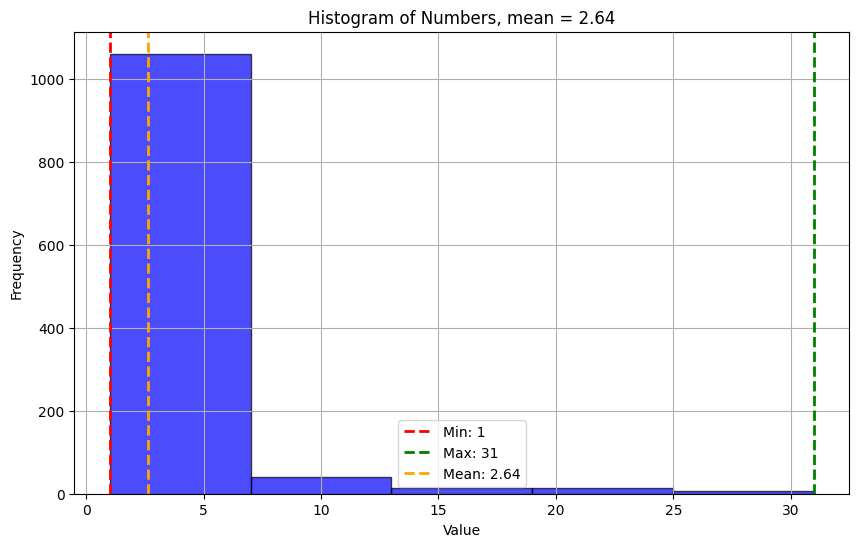

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Sample list of numbers
data = num_hypernym_lists

# Calculate min, max, and mean
min_value = np.min(data)
max_value = np.max(data)
mean_value = np.mean(data)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=5, alpha=0.7, color='blue', edgecolor='black')

# Adding lines for min, max, and mean
plt.axvline(min_value, color='red', linestyle='dashed', linewidth=2, label=f'Min: {min_value}')
plt.axvline(max_value, color='green', linestyle='dashed', linewidth=2, label=f'Max: {max_value}')
plt.axvline(mean_value, color='orange', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Adding labels and title
plt.title(f'Histogram of Numbers, mean = {mean_value:.2f}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [27]:
len(prompts), len(chosen), len(rejected)

(2149, 2149, 2149)